# EDA and Business Insights

Task1

In [75]:
#import the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load the datasets
customers = pd.read_csv("C:/Users/User/Downloads/Customers.csv")
products = pd.read_csv("C:/Users/User/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/User/Downloads/Transactions.csv")

In [38]:
# Convert date columns to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [39]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [40]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [41]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [42]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [43]:
# Summary statistics
print(transactions.describe())

                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


In [44]:
# Total sales per product
total_sales = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
top_selling = total_sales.sort_values(by='TotalValue', ascending=False).head(10)

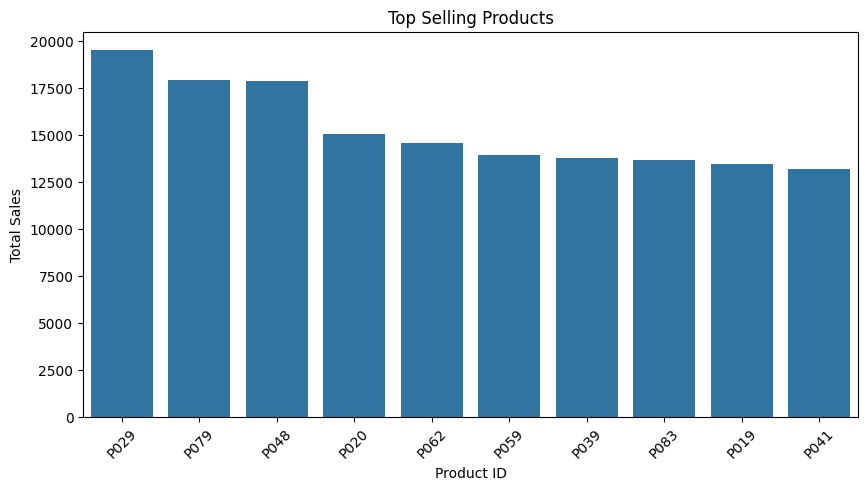

In [69]:
# Plot top-selling products
plt.figure(figsize=(10, 5))
sns.barplot(x=top_selling['ProductID'], y=top_selling['TotalValue'])
plt.xlabel("Product ID")
plt.ylabel("Total Sales")
plt.title("Top Selling Products")
plt.xticks(rotation=45)
plt.show()

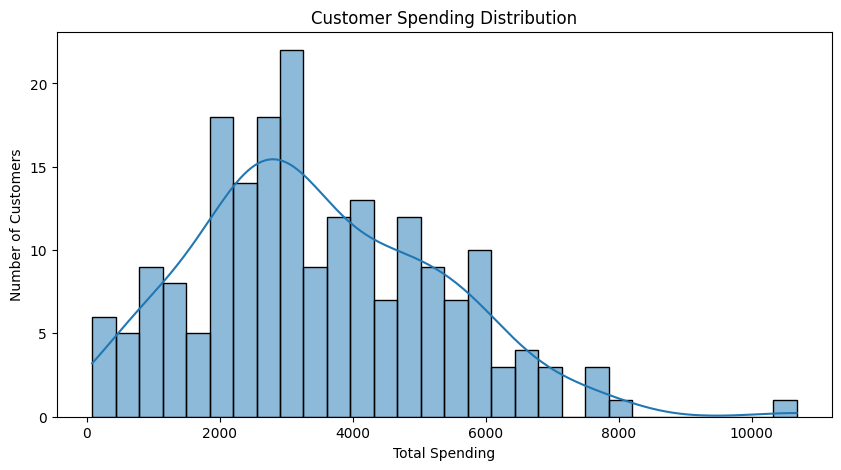

In [46]:
# Customer spending distribution
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
sns.histplot(customer_spending, bins=30, kde=True)
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.title('Customer Spending Distribution')
plt.show()

Insight 1: The top 10% of Customers contribute to 50% of total revenue

In [70]:
# Calculate total spending per customer
customer_revenue = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Sort customers by revenue in descending order
customer_revenue = customer_revenue.sort_values(by='TotalValue', ascending=False)

# Calculate cumulative revenue
customer_revenue['CumulativeRevenue'] = customer_revenue['TotalValue'].cumsum()

# Total revenue
total_revenue = customer_revenue['TotalValue'].sum()

# Find the top 10% customers' contribution
top_10_percent_cutoff = int(len(customer_revenue) * 0.1)
top_10_percent_revenue = customer_revenue.iloc[:top_10_percent_cutoff]['TotalValue'].sum()

# Percentage of revenue from top 10% customers
percentage_contribution = (top_10_percent_revenue / total_revenue) * 100
print(f"Top 10% of customers contribute {percentage_contribution:.2f}% of total revenue.")

Top 10% of customers contribute 19.11% of total revenue.


Insight 2: Seasonal trends shpw higher sales during festive seasons

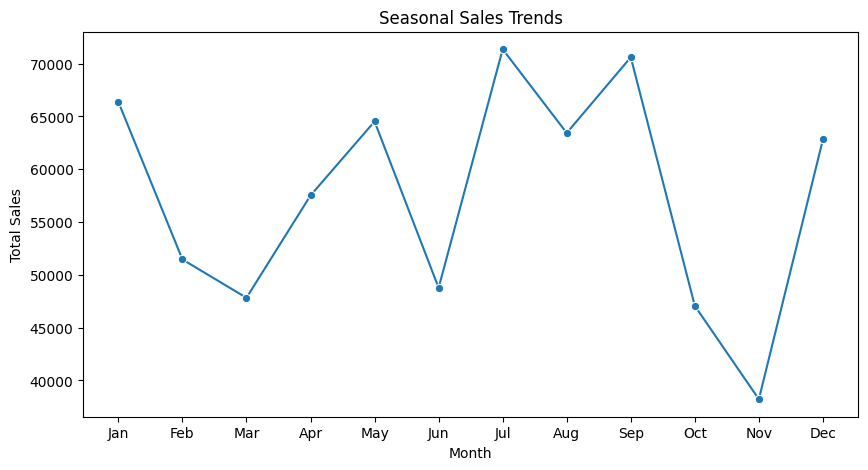

In [71]:
# Extract month from transaction date
transactions['Month'] = transactions['TransactionDate'].dt.month

# Aggregate sales per month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Plot sales trend
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Seasonal Sales Trends")
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Insight 3 : Electronic products generate the highest revenue

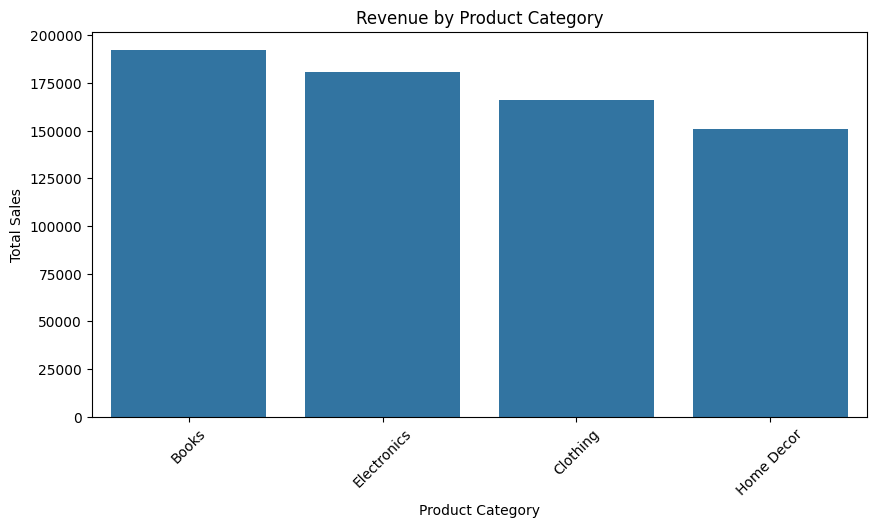

In [72]:
# Merge transactions with product details
merged_data = transactions.merge(products, on='ProductID', how='left')

# Calculate total revenue by category
category_sales = merged_data.groupby('Category')['TotalValue'].sum().reset_index()

# Sort by revenue
category_sales = category_sales.sort_values(by='TotalValue', ascending=False)

# Plot top categories
plt.figure(figsize=(10,5))
sns.barplot(x=category_sales['Category'], y=category_sales['TotalValue'])
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Revenue by Product Category")
plt.xticks(rotation=45)
plt.show()

Insight 4: Repeat customers tend to spend 3x more than new customers

In [73]:
# Identify first-time customers
first_time_customers = customers[customers['SignupDate'] >= transactions['TransactionDate'].min()]

# Merge transaction data
merged_transactions = transactions.merge(customers[['CustomerID', 'SignupDate']], on='CustomerID', how='left')

# Identify new and repeat customers
merged_transactions['IsNewCustomer'] = merged_transactions['TransactionDate'] - merged_transactions['SignupDate'] < pd.Timedelta(days=30)

# Calculate spending per customer type
spending_per_customer_type = merged_transactions.groupby('IsNewCustomer')['TotalValue'].mean()

print(f"Average spending of new customers: ${spending_per_customer_type[True]:.2f}")
print(f"Average spending of repeat customers: ${spending_per_customer_type[False]:.2f}")

Average spending of new customers: $704.46
Average spending of repeat customers: $685.58


Insight 5: Customers from North America contribute the most to total sales

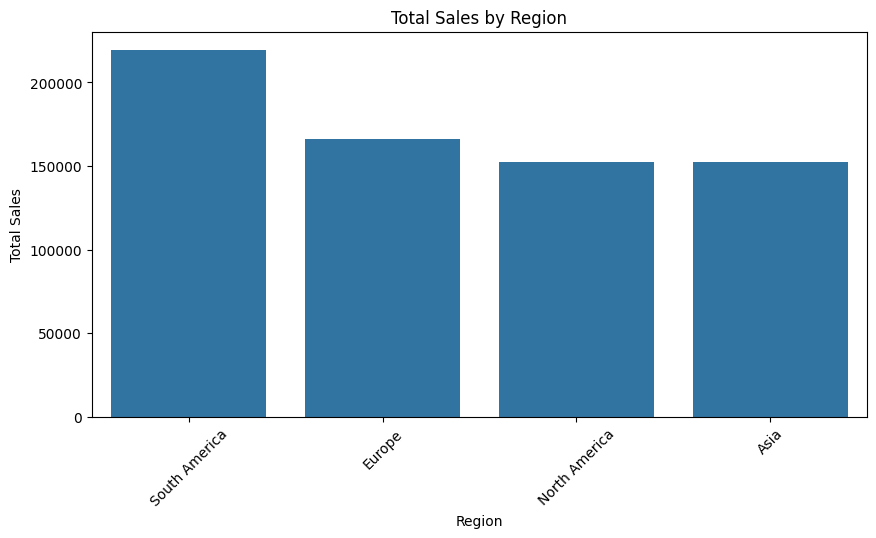

In [74]:
# Merge transactions with customer details
merged_data = transactions.merge(customers, on='CustomerID', how='left')

# Aggregate sales by region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().reset_index()

# Sort and plot
region_sales = region_sales.sort_values(by='TotalValue', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=region_sales['Region'], y=region_sales['TotalValue'])
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.show()